In [1]:
from keras.datasets import cifar10
from keras import layers, models, optimizers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation= 'relu', input_shape= (32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation= 'relu'))
model.add(layers.Conv2D(128, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation= 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

In [3]:
model.compile(optimizer= optimizers.RMSprop(lr=1e-4),
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [5]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                  rotation_range= 40,
                                  width_shift_range= 0.2,
                                  height_shift_range= 0.2,
                                  shear_range= 0.2,
                                  zoom_range= 0.2,
                                  horizontal_flip= True)

In [6]:
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_val = x_train[:1000]
x_val = x_val.astype('float32')
x_part = x_train[1000:3000] # select small data set to see effect of data augmentation in part 2
y_val = y_train[:1000]
y_part = y_train[1000:3000]

train_generator = train_datagen.flow(x_part, y= y_part, batch_size= 20)

In [7]:
history = model.fit(train_generator, steps_per_epoch= 100, epochs= 100, validation_data= (x_val, y_val))

Epoch 1/100
100/100 [==============================] - 3s 34ms/step - loss: 2.2613 - accuracy: 0.1395 - val_loss: 86.5376 - val_accuracy: 0.1820
Epoch 2/100
100/100 [==============================] - 3s 31ms/step - loss: 2.1006 - accuracy: 0.2035 - val_loss: 123.3347 - val_accuracy: 0.2390
Epoch 3/100
100/100 [==============================] - 4s 38ms/step - loss: 2.0324 - accuracy: 0.2375 - val_loss: 142.7227 - val_accuracy: 0.2730
Epoch 4/100
100/100 [==============================] - 3s 34ms/step - loss: 1.9720 - accuracy: 0.2650 - val_loss: 141.5783 - val_accuracy: 0.3130
Epoch 5/100
100/100 [==============================] - 3s 34ms/step - loss: 1.9459 - accuracy: 0.2695 - val_loss: 141.0011 - val_accuracy: 0.3230
Epoch 6/100
100/100 [==============================] - 3s 32ms/step - loss: 1.9109 - accuracy: 0.3030 - val_loss: 189.2097 - val_accuracy: 0.2940
Epoch 7/100
100/100 [==============================] - 3s 31ms/step - loss: 1.8844 - accuracy: 0.3060 - val_loss: 188.5018 - 

Epoch 57/100
100/100 [==============================] - 3s 28ms/step - loss: 1.4187 - accuracy: 0.5015 - val_loss: 401.6399 - val_accuracy: 0.3240
Epoch 58/100
100/100 [==============================] - 3s 28ms/step - loss: 1.4362 - accuracy: 0.4960 - val_loss: 391.4413 - val_accuracy: 0.3340
Epoch 59/100
100/100 [==============================] - 3s 27ms/step - loss: 1.4090 - accuracy: 0.4995 - val_loss: 344.6829 - val_accuracy: 0.3620
Epoch 60/100
100/100 [==============================] - 3s 27ms/step - loss: 1.4318 - accuracy: 0.4850 - val_loss: 326.4219 - val_accuracy: 0.3730
Epoch 61/100
100/100 [==============================] - 3s 28ms/step - loss: 1.4028 - accuracy: 0.5030 - val_loss: 468.6402 - val_accuracy: 0.3250
Epoch 62/100
100/100 [==============================] - 3s 28ms/step - loss: 1.4045 - accuracy: 0.4865 - val_loss: 401.4333 - val_accuracy: 0.3470
Epoch 63/100
100/100 [==============================] - 3s 28ms/step - loss: 1.3994 - accuracy: 0.4980 - val_loss: 485

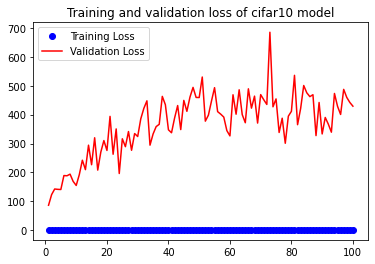

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label= 'Training Loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation Loss')
plt.title('Training and validation loss of cifar10 model')
plt.legend()
plt.savefig('Results/6_2b/Loss.png');

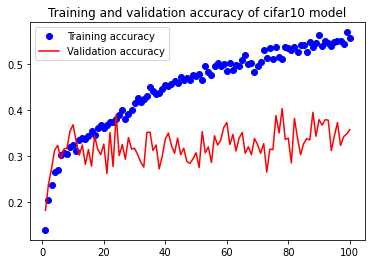

In [10]:
plt.plot(epochs, acc, 'bo', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.title('Training and validation accuracy of cifar10 model')
plt.legend()
plt.savefig('Results/6_2b/Accuracy.png');

In [11]:
model.save('Results/6_2b/model2.h5')

In [12]:
result = model.evaluate(x_test, y_test)
print(f'The model result for the test data is loss {result[0]} and accuracy {result[1]}')

313/313 [==============================] - 3s 11ms/step - loss: 1.3944 - accuracy: 0.5337
The model result for the test data is loss 1.3944133520126343 and accuracy 0.5336999893188477


In [13]:
import numpy as np
import pandas as pd
preds = model.predict(x_test)
pred_class = np.argmax(preds, axis= 1)
act = np.argmax(y_test, axis= 1)
pred_df = pd.DataFrame({'Actual':act, 'Predicted':pred_class})
pred_df

,Actual,Predicted
0,3,3
1,8,1
2,8,8
3,0,0
4,6,4
...,...,...
9995,8,5
9996,3,6
9997,5,5
9998,1,1


In [14]:
pred_df.to_csv('Results/6_2b/predictions.csv')